In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
xc1 = (0.2*np.random.normal(size = 100) + 2).reshape(-1, 2)
xc2 = (0.2*np.random.normal(size = 100) + 4).reshape(-1, 2)

[]

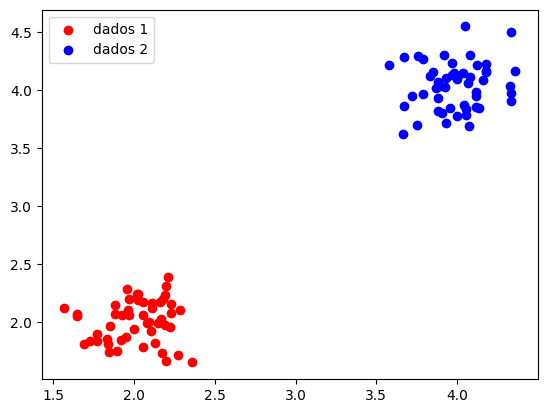

In [82]:
plt.scatter(xc1[:, 0], xc1[:, 1], color = 'red', label = 'dados 1')
plt.scatter(xc2[:, 0], xc2[:, 1], color = 'blue', label = 'dados 2')
plt.legend()
plt.plot()

In [83]:
xin = np.vstack([xc1, xc2])
xin.shape
zeros = np.zeros(xc1.shape[0])
ones = np.ones(xc2.shape[0])
y_real = np.concatenate((zeros, ones))

In [84]:
def train_perceptron(x_inp : np.array, yi : np.array, learn_rate : float, tol : float, max_epochs : int, control_var : bool): # Fazendo o treinamento do perceptron.
    try:
        n_rows = x_inp.shape[0]
        n_cols = x_inp.shape[1]
    except Exception as error:
        if error == "IndexError":
            print("Now, you don't have cols, so we will change it...\n")
            n_cols = 1
        else:
            print(f"The error {error} is hapenning \n")
            print("Breaking the program...")
            sys.exit()
    finally:
        if control_var == True:
            w = np.random.uniform(size = n_cols + 1) - 0.5 # Iniciando o vetor de pesos com pesos aleatórios e terá 1 posição a mais.
            x_inp = np.column_stack([x_inp, np.ones_like(x_inp[:, 0])])
        else:
            w = np.random.uniform(size = n_cols) - 0.5 # Inicializando os pesos com valores aleatórios e não terá 1 posição a mais.

        n_epochs = 0
        err_epoch = tol + 1
        while ((n_epochs < max_epochs) and (tol < err_epoch)):
            err_grad = 0
            rand_order = np.random.permutation(n_rows)
            for i in range(n_rows):
                i_rand = rand_order[i]
                x_rand_val = x_inp[i_rand, :]
                y_hat = 1 if np.dot(x_rand_val, w) >=0 else 0
                err = (yi[i_rand] - y_hat)
                dw = (learn_rate*err*x_inp[i_rand,])
                w = w + dw
                err_grad = err_grad + err**2
            n_epochs += 1
        return w

In [85]:
w = train_perceptron(xin, y_real, 0.01, 0.1, 10, True)

In [86]:
t = np.linspace(start = 0, stop = 5.5, num = 200)
y = -(w[0] / w[1])*t - (w[2] / w[1])

[]

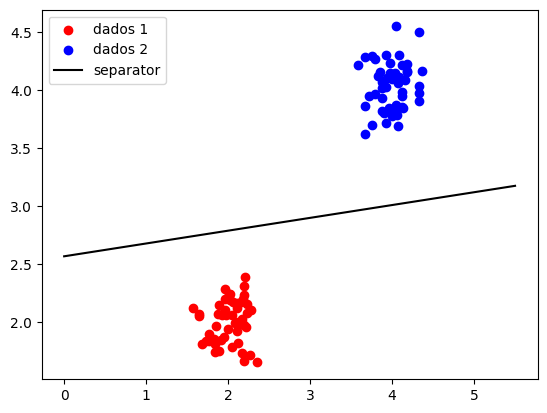

In [87]:
plt.scatter(xc1[:, 0], xc1[:, 1], color = 'red', label = 'dados 1')
plt.scatter(xc2[:, 0], xc2[:, 1], color = 'blue', label = 'dados 2')
plt.plot(t, y, color = 'black', label = 'separator')
plt.legend()
plt.plot()

[]

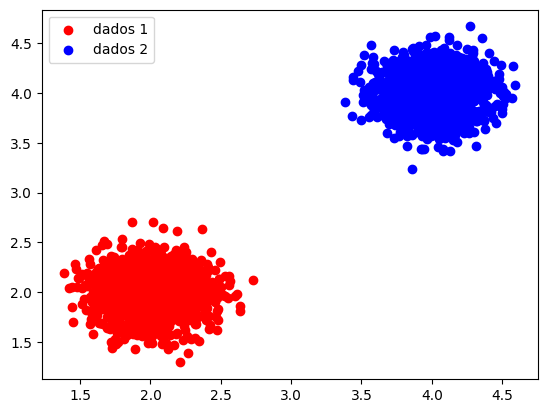

In [88]:
xc1_test = (0.2*np.random.normal(size = 3000) + 2).reshape(-1, 2)
xc2_test = (0.2*np.random.normal(size = 3000) + 4).reshape(-1, 2)
plt.scatter(xc1_test[:, 0], xc1_test[:, 1], color = 'red', label = 'dados 1')
plt.scatter(xc2_test[:, 0], xc2_test[:, 1], color = 'blue', label = 'dados 2')
plt.legend()
plt.plot()

In [89]:
xin_test = np.vstack([xc1_test, xc2_test])
zeros_test = np.zeros(xc1_test.shape[0])
ones_test = np.ones(xc2_test.shape[0])
y_real = np.concatenate((zeros_test, ones_test))

In [90]:
xin_test = np.column_stack([xin_test, np.ones_like(xin_test[:, 0])])

In [105]:
y_hat = xin_test @ w
y_hat = np.where(y_hat >=0, 1, 0)

In [113]:
sum = 0
for (index, value) in enumerate(y_hat):
    if value != y_real[index]:
        sum += 1
sum

0